# Gene Expression Data Science Project

### Phase 1:
Collect and explore data from NCBI GEO2R: https://www.ncbi.nlm.nih.gov/geo/geo2r/?acc=GSE18388

Goals for sample preprocessing:
 * Bring in data
 * Define Variables
 * Summarize 
 * Visualize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Raw Data

The raw data is a tab delimited file with a fairly large header. We'll bring in the raw data and skip the header down to the sample names that we want.

In [2]:
spaceFlown = pd.read_csv('Data/GSE18388_series_matrix.txt.gz', delimiter='\t',skiprows=31)

We can see below that there is still some header left but our column names are set to the sampke descriptions.

In [3]:
spaceFlown[25:35]

,!Sample_title,Space-Flown Thymus (FLT)-1,Space-Flown Thymus (FLT)-2,Space-Flown Thymus (FLT)-3,Space-Flown Thymus (FLT)-4,Control Thymus (AEM)-1,Control Thymus (AEM)-2,Control Thymus (AEM)-3,Control Thymus (AEM)-4
25,!Sample_contact_address,1656 E Mabel,1656 E Mabel,1656 E Mabel,1656 E Mabel,1656 E Mabel,1656 E Mabel,1656 E Mabel,1656 E Mabel
26,!Sample_contact_city,Tucson,Tucson,Tucson,Tucson,Tucson,Tucson,Tucson,Tucson
27,!Sample_contact_state,AZ,AZ,AZ,AZ,AZ,AZ,AZ,AZ
28,!Sample_contact_zip/postal_code,85724,85724,85724,85724,85724,85724,85724,85724
29,!Sample_contact_country,USA,USA,USA,USA,USA,USA,USA,USA
30,!Sample_supplementary_file,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM458n...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM458n...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM458n...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM458n...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM458n...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM458n...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM458n...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM458n...
31,!Sample_data_row_count,35557,35557,35557,35557,35557,35557,35557,35557
32,!series_matrix_table_begin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,ID_REF,GSM458594,GSM458595,GSM458596,GSM458597,GSM458598,GSM458599,GSM458600,GSM458601
34,10338001,11.71150504,11.6649732,11.92198125,11.53058547,11.56184388,11.91622762,11.38164452,11.45750899


Drop the rows from the header that we don't want in our raw data

In [4]:
spaceFlown = spaceFlown.drop(spaceFlown.index[0:34])

In [5]:
spaceFlown[:5]

,!Sample_title,Space-Flown Thymus (FLT)-1,Space-Flown Thymus (FLT)-2,Space-Flown Thymus (FLT)-3,Space-Flown Thymus (FLT)-4,Control Thymus (AEM)-1,Control Thymus (AEM)-2,Control Thymus (AEM)-3,Control Thymus (AEM)-4
34,10338001,11.71150504,11.6649732,11.92198125,11.53058547,11.56184388,11.91622762,11.38164452,11.45750899
35,10338002,6.273491332,6.438454077,6.012187956,6.529641458,6.49010158,6.444351316,6.401128246,6.416001061
36,10338003,10.31323037,10.36871109,10.63295717,10.13591981,10.22610827,10.67998187,10.02053086,10.10665246
37,10338004,9.232859751,9.265787374,9.475008419,9.125303512,9.294233243,9.510278492,8.970523792,9.113074867
38,10338005,1.885374449,2.09539317,2.009620764,2.070795684,2.058987659,2.101411886,2.043781576,2.071245021


This looks better but I want to rename that first column to ID_REF this is the reference to the Gene ID.

In [6]:
spaceFlown.rename(columns={'!Sample_title':'ID_REF'}, inplace=True)

In [7]:
spaceFlown[:5]

,ID_REF,Space-Flown Thymus (FLT)-1,Space-Flown Thymus (FLT)-2,Space-Flown Thymus (FLT)-3,Space-Flown Thymus (FLT)-4,Control Thymus (AEM)-1,Control Thymus (AEM)-2,Control Thymus (AEM)-3,Control Thymus (AEM)-4
34,10338001,11.71150504,11.6649732,11.92198125,11.53058547,11.56184388,11.91622762,11.38164452,11.45750899
35,10338002,6.273491332,6.438454077,6.012187956,6.529641458,6.49010158,6.444351316,6.401128246,6.416001061
36,10338003,10.31323037,10.36871109,10.63295717,10.13591981,10.22610827,10.67998187,10.02053086,10.10665246
37,10338004,9.232859751,9.265787374,9.475008419,9.125303512,9.294233243,9.510278492,8.970523792,9.113074867
38,10338005,1.885374449,2.09539317,2.009620764,2.070795684,2.058987659,2.101411886,2.043781576,2.071245021


Check to see if we have any Null values:

In [8]:
spaceFlown.isna().sum()

ID_REF                        0
Space-Flown Thymus (FLT)-1    1
Space-Flown Thymus (FLT)-2    1
Space-Flown Thymus (FLT)-3    1
Space-Flown Thymus (FLT)-4    1
Control Thymus (AEM)-1        1
Control Thymus (AEM)-2        1
Control Thymus (AEM)-3        1
Control Thymus (AEM)-4        1
dtype: int64

We have one Null in each row, lets remove that.

In [9]:
spaceFlown.dropna(inplace=True)

And what are the data types?

In [10]:
spaceFlown.dtypes

ID_REF                        object
Space-Flown Thymus (FLT)-1    object
Space-Flown Thymus (FLT)-2    object
Space-Flown Thymus (FLT)-3    object
Space-Flown Thymus (FLT)-4    object
Control Thymus (AEM)-1        object
Control Thymus (AEM)-2        object
Control Thymus (AEM)-3        object
Control Thymus (AEM)-4        object
dtype: object

In [11]:
spaceFlown.dtypes.eq(object)

ID_REF                        True
Space-Flown Thymus (FLT)-1    True
Space-Flown Thymus (FLT)-2    True
Space-Flown Thymus (FLT)-3    True
Space-Flown Thymus (FLT)-4    True
Control Thymus (AEM)-1        True
Control Thymus (AEM)-2        True
Control Thymus (AEM)-3        True
Control Thymus (AEM)-4        True
dtype: bool

We can't plot object variables so lets set the column names to a variable and loop through each to convert all columns to numeric.

In [12]:
cols = spaceFlown.columns[spaceFlown.dtypes.eq(object)]

In [13]:
spaceFlown[cols] = spaceFlown[cols].apply(pd.to_numeric, errors='coerce', axis=0)

In [14]:
spaceFlown.dtypes.eq(object)

ID_REF                        False
Space-Flown Thymus (FLT)-1    False
Space-Flown Thymus (FLT)-2    False
Space-Flown Thymus (FLT)-3    False
Space-Flown Thymus (FLT)-4    False
Control Thymus (AEM)-1        False
Control Thymus (AEM)-2        False
Control Thymus (AEM)-3        False
Control Thymus (AEM)-4        False
dtype: bool

Now our data looks good, lets do a boxplot, but first we'll make an array of the column names for the samples. 

In [15]:
sample_cols = cols[1:len(cols)]

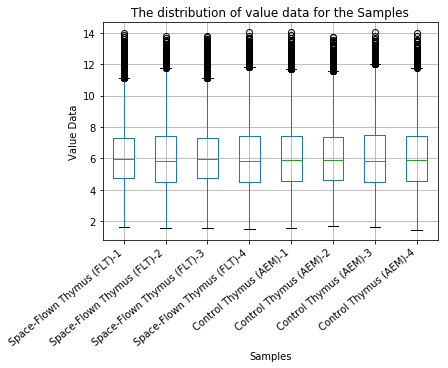

In [24]:
fig, ax = plt.subplots()
spaceFlown[sample_cols].boxplot().set_xlabel("Samples")
ax.set_xticklabels(sample_cols, rotation=40, ha='right')
ax.set_ylabel("Value Data")
ax.set_title("The distribution of value data for the Samples")

plt.show()

### Get GEO2R Analysis Data

This data is derived from the GE

In [17]:
spaceFlown_GEO2R = pd.read_table("Data/spaceFlown.txt", sep="\t")

In [18]:
spaceFlown_GEO2R[:5]

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
0,10358454,0.00509,1.960000e-07,-13.50,4.37730,-1.38,Rbm3,RNA binding motif protein 3
1,10603469,0.00509,2.860000e-07,-12.90,4.24228,-1.30,Rbm3,RNA binding motif protein 3
2,10556113,0.00546,4.610000e-07,-12.20,4.06259,-1.41,Rbm3,RNA binding motif protein 3
3,10535904,0.00844,9.500000e-07,11.30,3.76621,1.89,Hsph1,heat shock 105kDa/110kDa protein 1
4,10490946,0.03472,5.440000e-06,9.21,2.93118,1.02,Hsp90aa1,"heat shock protein 90, alpha (cytosolic), clas..."
